# Scikit-Learn machine learning algorithms - run through

- plotting in matplotlib
- data prep and save open model, train test split
- KNN
- SVM
- Linear Regression
- KMeans
- Logistic Regression, Pipeline, ColumnTrasformer
- Naive Bayes
- Decision Trees, Random Forests
- Ensemble Learning: boosting algorithms (LightGBM, XGBoost, CatBoost, etc.)

## Plotting data points

In [3]:
import matplotlib.pyplot as plt

Text(0.5,1,'y vs x')

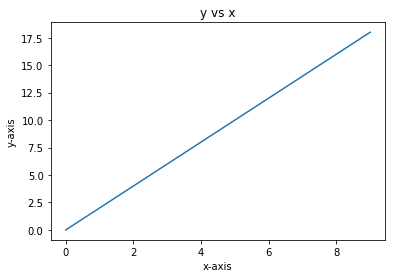

In [6]:
x = [i for i in range(10)]
y = [2*i for i in range(10)]
plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('y vs x')

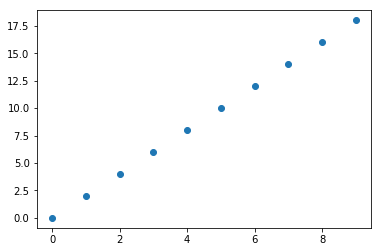

In [7]:
plt.scatter(x,y) #to have data points rather than line

## Preparing the data and saving the model

Models:
- features, attributes, independent variables, inputs (X)
- label, dependent variable, output (y)
- in particular, often features need to be from 0 to 1 so we will need scaling and preprocessing

### Save and Open a model

So you don't need to re train the model everytime you need it, you can just save it and open when needed. Say you have created and fitted your model and now want to save it

In [8]:
from sklearn.externals import joblib

C:\Users\Matteo.Belloni\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


clf = ... (this is the fitted model)

filename = 'movel.sav'

joblib.dump(clf, filename) #save

clf = joblib.load(filename) #open

### Train test split

In [10]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

#split in features and labels
X = iris.data
y = iris.target

print(X.shape)
print(y.shape) #4 features and 1 label (0,1,2 values of label)

(150, 4)
(150,)


Part of the data is used to train the model and part to test it. Hence the need to split the data into train and test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #meaning 20% for testing purposes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## KNN

This is both used for Classification and Regression:
- Given a x for which we want to estimate the class, it takes the k-nearest neighbours from the labelled dataset and assigns x to the majority class across those k points
- usually k odd to help the calculations
- usually you try different values of k and choose the one at the elbow

In [14]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [51]:
data = pd.read_csv('car.data')
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [55]:
X = data[['buying', 'maint', 'safety']].values
y = data[['class']]
print(X)

[['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ['vhigh' 'vhigh' 'low']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]


In [56]:
Le = LabelEncoder()
for i in range(len(X[0])): #for all columns/features
    X[:,i] = Le.fit_transform(X[:,i]) #conver low, medium, high to numbers ordered
    
print(X)

[[3 3 2]
 [3 3 0]
 [3 3 1]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [57]:
label_mapping = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}
y['class'] = y['class'].map(label_mapping)
y = np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


C:\Users\Matteo.Belloni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)

print(accuracy)

C:\Users\Matteo.Belloni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.7427745664739884


In [60]:
x = [[3,3,3]]
y_pred = knn.predict(x)
print(y_pred)

[0]


## Support Vector Machine (SVM)

This is both used for Classification and Regression
- especially useful for non-linear problems solved with kernel functions
- draws a hyperplane as decision boundaries
- computes the distance from the hyperplane and the closest points (support vectors) of the two classes
- starts with random hyperplane and then optimise to find the hyperplane that maximise the distance (margin) from the support vectors
- in particular, for non-linear problems it uses kernels to increase the dimension and make the problem linear in the higher dimension

In [98]:
#back to the iris example
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

In [ ]:
#split features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC() #this is the classifier
model.fit(X_train, y_train)

prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.9666666666666667


## Linear Regression

In [76]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [71]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [119]:
X = boston.data
y = boston.target
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


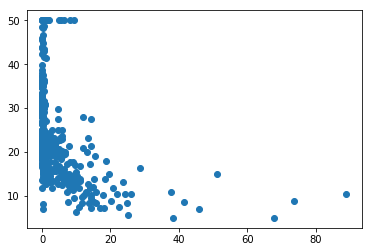

In [120]:
plt.scatter(X.T[0], y) #plotting first feature against the target (.T to transpose col to rows and then take first row)

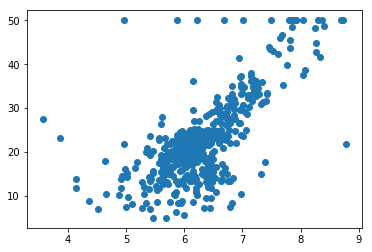

In [121]:
plt.scatter(X.T[5], y)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

l_reg = linear_model.LinearRegression()
l_reg.fit(X_train, y_train)

prediction = l_reg.predict(X_test)

r2_train = l_reg.score(X_train, y_train)
r2_test = l_reg.score(X_test, y_test)
print(r2_train)
print(r2_test)

0.7560226547105668
0.6493600628408519


In [126]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [128]:
X.shape, y.shape

((506, 13), (506,))

## KMeans

In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

In [88]:
bc = load_breast_cancer()
print(bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [90]:
x = bc.data #clustering problem so we only have and use features!
print(x)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [93]:
x = scale(bc.data)
x_train, x_test = train_test_split(x, test_size = 0.2)

In [95]:
model = KMeans(n_clusters = 2, random_state = 0)
model.fit(x_train)
pred = model.predict(x_test)
labels = model.labels_
print(labels)

[0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 1 1 1]


In [167]:
#another example with Iris
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

X = iris.data[:,0:2]
y = iris.target

In [175]:
X_train, X_test = train_test_split(X, test_size = 0.2)

In [176]:
KM = KMeans(n_clusters = 3)
KM.fit(X_train)
KM.predict(X_test)

array([1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 1, 2, 0, 2])

## Logistic Regression with Pipeline and ColumnTransformer

In [144]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)

In [145]:
print(X.shape) #30 features
print(y.shape)
print(y.value_counts()) # 0,1 classes balanced enough

(569, 30)
(569, 1)
1    357
0    212
dtype: int64


In [146]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

numeric_transformer = Pipeline([('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, X.columns)])

clf = Pipeline(steps = [('preprocessor',preprocessor),
                        ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape((569,)), test_size = 0.2)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9736842105263158


## Naive Bayes

In [156]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [159]:
data = load_breast_cancer()
X = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)
#no need for preprocessing (scaling/hot encoding)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape((569,)), test_size = 0.2)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

predictions = NB_clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9122807017543859


In [160]:
confusion_matrix(y_train, NB_clf.predict(X_train))

array([[149,  17],
       [  7, 282]], dtype=int64)

## Decision Trees and Random Forests

In [182]:
data = pd.read_csv('car.data')
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [185]:
data = data[['buying','maint','safety','class']]
data.head()

,buying,maint,safety,class
0,vhigh,vhigh,med,unacc
1,vhigh,vhigh,high,unacc
2,vhigh,vhigh,low,unacc
3,vhigh,vhigh,med,unacc
4,vhigh,vhigh,high,unacc


In [243]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

OHE = OneHotEncoder(drop='first', sparse = False)
LE = LabelEncoder()

X = data[['buying','maint']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = OHE.fit_transform(X_train)
X_test = OHE.transform(X_test)

y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)

In [244]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.6994219653179191


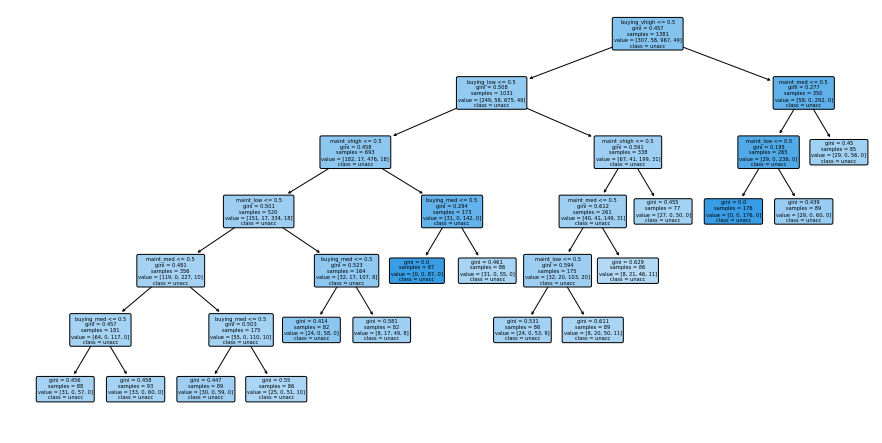

In [246]:
plt.figure(figsize = (15, 7.5))
plot_tree(dt, filled = True, rounded = True, class_names = list(LE.classes_), feature_names = list(OHE.get_feature_names(['buying','maint'])))
plt.show()

In [241]:
OHE.get_feature_names(['buying','maint','safety'])

array(['buying_low', 'buying_med', 'buying_vhigh', 'maint_low',
       'maint_med', 'maint_vhigh', 'safety_low', 'safety_med'],
      dtype=object)

In [249]:
#Random Forests

In [250]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.6994219653179191


In [261]:
#let's see best set of hyperparameters now
from sklearn.model_selection import GridSearchCV

param_grd = {'max_depth':[80, 90],
             'n_estimators':[100,200]}

rf = RandomForestClassifier()

grd = GridSearchCV(estimator = rf, param_grid = param_grd, cv = 3, n_jobs = -1, verbose = 2)

In [264]:
grd.best_params_

## Ensemble Learning

It is the application of multiple models to obtain better performance than from a single model: combine individual models together. 
- higher predictive performance (accuracy)
- multiple ml models into one predictive models (robustness)

How:
- decrease variance using bagging (parallel or bootstrap)
- decrease bias using boosting (sequential)
- improve prediction using stacking

Two groups:
- sequential methods: base learners generated consecutively (AdaBoosting), use dependence by weighing previously mislabelled items more
- parallel methods: base learners generated in parallel (RandomForest), use independence between base learners

Averaging: this is a way to do ensamble learning (e.g mode of predictions of the class aka majority class)

Weighted averaging: the contribution is weighted based on the performance of each model in the ensamble

Random Forest is an example of ensemble machine learning method: uses decision trees

Boosting:
- train the model
- identify items or regions where the first model produces errors and add weights to them and then train the secondo model
- aggregate those samples for which model 1 gives a different result than model 2, build model 3....

Different algorithms for Boosting:
- XGBoost -> it grows (splits) the tree level-wise
- Light GBM -> it grows (splits) the tree leaf-wise - can overfit so use hyperparameters
- and of course, also sklearn algorithms which usually are not as precise at the above two though
- CatBoost -> useful for categorical data, but slower

In [272]:
data = pd.read_csv('car.data')
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [274]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

OHE = OneHotEncoder(drop='first', sparse = False)
LE = LabelEncoder()

X = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train = OHE.fit_transform(X_train)
X_test = OHE.transform(X_test)

y_train = LE.fit_transform(y_train)
y_test = LE.transform(y_test)

In [278]:
from sklearn.ensemble import GradientBoostingClassifier

model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9682080924855492
[[ 73   1   0   1]
 [  1  13   0   1]
 [  6   1 241   0]
 [  0   0   0   8]]


In [279]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
"""
alternative to GradientBoosting based on the lightGBM library - normally a bit faster, but experimental!
"""

model2 = HistGradientBoostingClassifier()
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

1.0
[[ 75   0   0   0]
 [  0  15   0   0]
 [  0   0 248   0]
 [  0   0   0   8]]


In [280]:
from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9508670520231214
[[ 71   1   2   1]
 [  2  12   0   1]
 [  7   1 240   0]
 [  1   1   0   6]]


In [281]:
from lightgbm import LGBMClassifier

model4 = LGBMClassifier()
model4.fit(X_train, y_train)
pred = model4.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9913294797687862
[[ 74   1   0   0]
 [  1  14   0   0]
 [  1   0 247   0]
 [  0   0   0   8]]


In [282]:
from catboost import CatBoostClassifier
"""
support for categorical variables
quite slow!
"""

model5 = CatBoostClassifier()
model5.fit(X_train, y_train)
pred = model5.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

Learning rate set to 0.018357
0:	learn: 0.6659330	total: 156ms	remaining: 2m 35s
1:	learn: 0.6473548	total: 278ms	remaining: 2m 18s
2:	learn: 0.6247005	total: 429ms	remaining: 2m 22s
3:	learn: 0.6036201	total: 574ms	remaining: 2m 22s
4:	learn: 0.5804631	total: 664ms	remaining: 2m 12s
5:	learn: 0.5608755	total: 795ms	remaining: 2m 11s
6:	learn: 0.5435631	total: 1.09s	remaining: 2m 34s
7:	learn: 0.5305766	total: 1.26s	remaining: 2m 36s
8:	learn: 0.5145876	total: 1.38s	remaining: 2m 31s
9:	learn: 0.5058541	total: 1.49s	remaining: 2m 27s
10:	learn: 0.4932625	total: 1.62s	remaining: 2m 25s
11:	learn: 0.4894176	total: 1.73s	remaining: 2m 22s
12:	learn: 0.4798820	total: 1.79s	remaining: 2m 15s
13:	learn: 0.4721563	total: 1.89s	remaining: 2m 13s
14:	learn: 0.4614320	total: 2.03s	remaining: 2m 13s
15:	learn: 0.4500321	total: 2.16s	remaining: 2m 13s
16:	learn: 0.4405496	total: 2.3s	remaining: 2m 12s
17:	learn: 0.4306649	total: 2.43s	remaining: 2m 12s
18:	learn: 0.4240043	total: 2.56s	remaining: 

160:	learn: 0.1900074	total: 22.5s	remaining: 1m 57s
161:	learn: 0.1899305	total: 22.6s	remaining: 1m 56s
162:	learn: 0.1891456	total: 22.8s	remaining: 1m 56s
163:	learn: 0.1884878	total: 22.9s	remaining: 1m 56s
164:	learn: 0.1884219	total: 23s	remaining: 1m 56s
165:	learn: 0.1882784	total: 23.1s	remaining: 1m 56s
166:	learn: 0.1857424	total: 23.3s	remaining: 1m 55s
167:	learn: 0.1848517	total: 23.4s	remaining: 1m 56s
168:	learn: 0.1830470	total: 23.6s	remaining: 1m 56s
169:	learn: 0.1824804	total: 23.7s	remaining: 1m 55s
170:	learn: 0.1817428	total: 23.9s	remaining: 1m 55s
171:	learn: 0.1813460	total: 24s	remaining: 1m 55s
172:	learn: 0.1805715	total: 24.2s	remaining: 1m 55s
173:	learn: 0.1794593	total: 24.4s	remaining: 1m 55s
174:	learn: 0.1793976	total: 24.5s	remaining: 1m 55s
175:	learn: 0.1787636	total: 24.8s	remaining: 1m 55s
176:	learn: 0.1787472	total: 24.8s	remaining: 1m 55s
177:	learn: 0.1786751	total: 25s	remaining: 1m 55s
178:	learn: 0.1785827	total: 25.1s	remaining: 1m 55s

318:	learn: 0.1324783	total: 44.9s	remaining: 1m 35s
319:	learn: 0.1324670	total: 45s	remaining: 1m 35s
320:	learn: 0.1324603	total: 45s	remaining: 1m 35s
321:	learn: 0.1322250	total: 45.2s	remaining: 1m 35s
322:	learn: 0.1322163	total: 45.3s	remaining: 1m 34s
323:	learn: 0.1319493	total: 45.4s	remaining: 1m 34s
324:	learn: 0.1319364	total: 45.5s	remaining: 1m 34s
325:	learn: 0.1319333	total: 45.6s	remaining: 1m 34s
326:	learn: 0.1317846	total: 45.8s	remaining: 1m 34s
327:	learn: 0.1314253	total: 45.9s	remaining: 1m 34s
328:	learn: 0.1314043	total: 46s	remaining: 1m 33s
329:	learn: 0.1313922	total: 46.1s	remaining: 1m 33s
330:	learn: 0.1313794	total: 46.1s	remaining: 1m 33s
331:	learn: 0.1313693	total: 46.3s	remaining: 1m 33s
332:	learn: 0.1312534	total: 46.4s	remaining: 1m 32s
333:	learn: 0.1311126	total: 46.6s	remaining: 1m 32s
334:	learn: 0.1311016	total: 46.7s	remaining: 1m 32s
335:	learn: 0.1310969	total: 46.8s	remaining: 1m 32s
336:	learn: 0.1310938	total: 46.8s	remaining: 1m 32s

476:	learn: 0.1160684	total: 1m	remaining: 1m 5s
477:	learn: 0.1160502	total: 1m	remaining: 1m 5s
478:	learn: 0.1153444	total: 1m	remaining: 1m 5s
479:	learn: 0.1152920	total: 1m	remaining: 1m 5s
480:	learn: 0.1152888	total: 1m	remaining: 1m 5s
481:	learn: 0.1152268	total: 1m	remaining: 1m 4s
482:	learn: 0.1151788	total: 1m	remaining: 1m 4s
483:	learn: 0.1151758	total: 1m	remaining: 1m 4s
484:	learn: 0.1151729	total: 1m	remaining: 1m 4s
485:	learn: 0.1151542	total: 1m	remaining: 1m 4s
486:	learn: 0.1151485	total: 1m	remaining: 1m 3s
487:	learn: 0.1148132	total: 1m	remaining: 1m 3s
488:	learn: 0.1144789	total: 1m	remaining: 1m 3s
489:	learn: 0.1144601	total: 1m 1s	remaining: 1m 3s
490:	learn: 0.1144527	total: 1m 1s	remaining: 1m 3s
491:	learn: 0.1144524	total: 1m 1s	remaining: 1m 3s
492:	learn: 0.1139933	total: 1m 1s	remaining: 1m 2s
493:	learn: 0.1139930	total: 1m 1s	remaining: 1m 2s
494:	learn: 0.1139472	total: 1m 1s	remaining: 1m 2s
495:	learn: 0.1139450	total: 1m 1s	remaining: 1m 2s

635:	learn: 0.0966383	total: 1m 13s	remaining: 42.1s
636:	learn: 0.0966150	total: 1m 13s	remaining: 42s
637:	learn: 0.0966052	total: 1m 13s	remaining: 41.9s
638:	learn: 0.0965474	total: 1m 13s	remaining: 41.8s
639:	learn: 0.0965069	total: 1m 14s	remaining: 41.6s
640:	learn: 0.0965052	total: 1m 14s	remaining: 41.5s
641:	learn: 0.0965051	total: 1m 14s	remaining: 41.4s
642:	learn: 0.0965018	total: 1m 14s	remaining: 41.2s
643:	learn: 0.0965008	total: 1m 14s	remaining: 41.1s
644:	learn: 0.0963977	total: 1m 14s	remaining: 41s
645:	learn: 0.0963960	total: 1m 14s	remaining: 40.9s
646:	learn: 0.0963959	total: 1m 14s	remaining: 40.7s
647:	learn: 0.0963929	total: 1m 14s	remaining: 40.5s
648:	learn: 0.0962396	total: 1m 14s	remaining: 40.4s
649:	learn: 0.0962291	total: 1m 14s	remaining: 40.3s
650:	learn: 0.0962214	total: 1m 14s	remaining: 40.2s
651:	learn: 0.0962195	total: 1m 14s	remaining: 40s
652:	learn: 0.0961708	total: 1m 15s	remaining: 39.9s
653:	learn: 0.0960246	total: 1m 15s	remaining: 39.8s

792:	learn: 0.0872495	total: 1m 27s	remaining: 22.7s
793:	learn: 0.0872485	total: 1m 27s	remaining: 22.6s
794:	learn: 0.0872330	total: 1m 27s	remaining: 22.5s
795:	learn: 0.0872149	total: 1m 27s	remaining: 22.4s
796:	learn: 0.0872074	total: 1m 27s	remaining: 22.3s
797:	learn: 0.0872008	total: 1m 27s	remaining: 22.2s
798:	learn: 0.0872001	total: 1m 27s	remaining: 22s
799:	learn: 0.0870201	total: 1m 27s	remaining: 21.9s
800:	learn: 0.0870191	total: 1m 27s	remaining: 21.8s
801:	learn: 0.0869052	total: 1m 27s	remaining: 21.7s
802:	learn: 0.0868145	total: 1m 28s	remaining: 21.6s
803:	learn: 0.0868136	total: 1m 28s	remaining: 21.5s
804:	learn: 0.0868129	total: 1m 28s	remaining: 21.3s
805:	learn: 0.0868129	total: 1m 28s	remaining: 21.2s
806:	learn: 0.0868124	total: 1m 28s	remaining: 21.1s
807:	learn: 0.0868038	total: 1m 28s	remaining: 21s
808:	learn: 0.0868004	total: 1m 28s	remaining: 20.8s
809:	learn: 0.0866928	total: 1m 28s	remaining: 20.7s
810:	learn: 0.0864237	total: 1m 28s	remaining: 20.

950:	learn: 0.0801785	total: 1m 38s	remaining: 5.1s
951:	learn: 0.0801784	total: 1m 38s	remaining: 4.99s
952:	learn: 0.0801645	total: 1m 39s	remaining: 4.88s
953:	learn: 0.0801568	total: 1m 39s	remaining: 4.78s
954:	learn: 0.0800875	total: 1m 39s	remaining: 4.67s
955:	learn: 0.0800833	total: 1m 39s	remaining: 4.57s
956:	learn: 0.0800384	total: 1m 39s	remaining: 4.46s
957:	learn: 0.0800343	total: 1m 39s	remaining: 4.36s
958:	learn: 0.0800340	total: 1m 39s	remaining: 4.25s
959:	learn: 0.0798496	total: 1m 39s	remaining: 4.15s
960:	learn: 0.0798446	total: 1m 39s	remaining: 4.04s
961:	learn: 0.0798437	total: 1m 39s	remaining: 3.94s
962:	learn: 0.0798326	total: 1m 39s	remaining: 3.83s
963:	learn: 0.0798320	total: 1m 39s	remaining: 3.73s
964:	learn: 0.0797497	total: 1m 39s	remaining: 3.63s
965:	learn: 0.0797391	total: 1m 40s	remaining: 3.52s
966:	learn: 0.0797383	total: 1m 40s	remaining: 3.42s
967:	learn: 0.0797310	total: 1m 40s	remaining: 3.31s
968:	learn: 0.0797222	total: 1m 40s	remaining: 